<a href="https://colab.research.google.com/github/RifatMuhtasim/NLP_Natural_Language_Processing/blob/main/Learn/21.Word_Embeddings_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#News Classification (Fake or Real)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import spacy

In [2]:
#load dataset
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/14_word_vectors_spacy_text_classification/Fake_Real_Data.csv")
print("Shape of dataset: ", df.shape)
df.head()

Shape of dataset:  (9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


## Text Extraction & Cleanup

In [3]:
#display the label name with their value counts
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

This dataset is an imbalanced dataset.

In [4]:
#create a new "fake" column
df['fake'] = df['label'].apply(lambda x: 1 if x == "Fake" else 0)
df.head()

,Text,label,fake
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1
1,U.S. conservative leader optimistic of common ...,Real,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1
4,Democrats say Trump agrees to work on immigrat...,Real,0


## Pre-processing

In [5]:
#Download the model
# !python -m spacy download en_core_web_lg

In [6]:
#remove stop words and punctuations using Spacy and convert token to base word
nlp = spacy.load("en_core_web_lg") #load pretrained model

def Preprocess(text):
    doc = nlp(text)

    filtered_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [7]:
#Tokenization and Lemmatization
df['text'] = df['Text'].apply(Preprocess)
df.head()

,Text,label,fake,text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,0,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,Trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,0,Democrats Trump agree work immigration bill wa...


## Feature Engineering (Word2Vec)

In [8]:
#using spacy create word to vector
df['vector'] = df['text'].apply(lambda x: nlp(x).vector)
df.head()

,Text,label,fake,text,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,Trump Surrogate BRUTALLY Stabs Pathetic vide...,"[0.23517725, 1.5265795, -2.0906563, 0.02504843..."
1,U.S. conservative leader optimistic of common ...,Real,0,U.S. conservative leader optimistic common gro...,"[-0.6691326, 0.62931126, -1.5525453, 1.4249555..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,Trump propose U.S. tax overhaul stir concern d...,"[-1.0787294, -0.42471677, -2.4816692, 1.496829..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,Court Forces Ohio allow million illegally pu...,"[-1.5941342, 0.4442709, -1.5567913, 2.0706172,..."
4,Democrats say Trump agrees to work on immigrat...,Real,0,Democrats Trump agree work immigration bill wa...,"[-0.6243596, 0.7249644, -2.0244102, 1.5570543,..."


In [9]:
#train test split
X = df['vector']
y = df['fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [10]:
#using numpy 2d stack
X_train_2d = np.stack(X_train.values)
X_test_2d = np.stack(X_test.values)

In [11]:
#using min max scaler to remove negative value
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.fit_transform(X_test_2d)

## Model Building

In [12]:
#Multinomial NB Model
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)

#prediction
y_pred = nb_model.predict(X_test_scaled)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       980
           1       0.94      0.97      0.95      1000

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [13]:
#K Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_model.fit(X_train_scaled, y_train)

#prediciton
y_pred = knn_model.predict(X_test_scaled)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1000

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



## Evaluation

[]

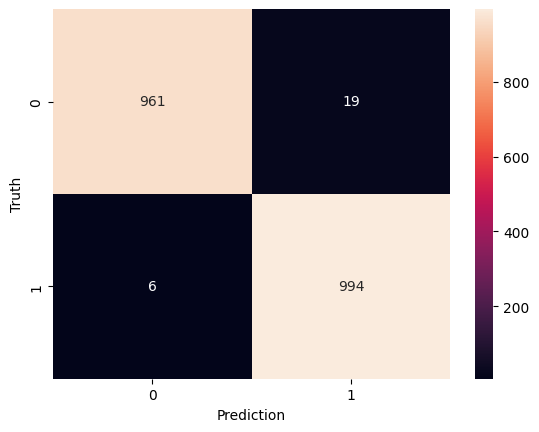

In [14]:
#plot confusion matrix for KNN
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.plot()